In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(4)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
print(X_train.shape)
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

(200, 2)


(50, 50)
(2500,)
(50, 50)
(2500, 2)
(2500,)
[ 2.01516851  1.70122732  1.87450954  1.80568797  2.09967501  2.18560091
  2.12752172  1.65295512  1.81793382  2.21700248  1.7051025   2.04796788
  2.66700807  2.50770731  2.49072426  1.80463225  2.01440187  1.66832479
  2.62636126  1.91713899  1.65686043  1.59576191  1.96078861  1.90911081
  1.94097642  2.23598068  2.01126425  1.76637802  1.5633397   2.15293366
  2.74297525  2.0202413   2.08914236  2.38154559  2.04754086  2.34925627
  2.41397603  2.23857018  1.72836856  2.28039502  1.67086343  1.28606742
  1.67741297  1.83053741  2.26125253  2.0145809   2.06279405  2.28640958
  1.85125444  1.71668942  2.22147413  2.18442219  2.47366227  2.00902012
  2.02437913  2.6096538   1.49511053  1.57513174  2.41237797  2.18405979
  2.12241745  1.89516561  2.21548232  2.20214045  1.79565547  2.31227191
  1.63777986  2.338512    2.09087061  1.79692972  1.74411462  1.91267126
  2.01159056  1.97600615  2.42038307  2.03447665  1.84748593  2.45953726
  2.229

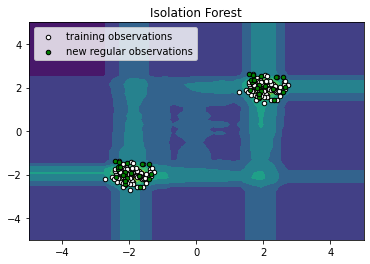

In [79]:

# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
# desision_function返回的是，异常值的概率
print(xx.shape)
print(xx.ravel().shape)
print(yy.shape)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
print(np.c_[xx.ravel(), yy.ravel()].shape)
print(Z.shape)

Z = Z.reshape(xx.shape)
# print(Z.shape)
# print(Z)

plt.title("Isolation Forest")
# lt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
plt.contourf(xx, yy, Z)

# 2.1499854   2.20807955
print(X_train[:, 0])

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green', s=20, edgecolor='k')
# c =  plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2],
           ["training observations",
            "new regular observations"],
           loc="upper left")
# plt.legend([b1, b2, c],
#            ["training observations",
#             "new regular observations", 
#             "new abnormal observations"],
#            loc="upper left")
plt.show()